In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

## Importing the data

In [3]:
dataset = pd.read_csv(r"foml_data.csv")
dataset

,Day,Breakfast,Lunch,Dinner,Holiday,time
0,Sunday,1,0,0,1,40
1,Monday,1,0,0,0,23
2,Tuesday,1,0,0,0,26
3,Wednesday,1,0,0,0,31
4,Thursday,1,0,0,0,44
5,Friday,1,0,0,0,18
6,Saturday,1,0,0,1,46
7,Sunday,1,0,0,1,37
8,Monday,1,0,0,0,22
9,Tuesday,1,0,0,0,28


In [4]:
#Seperating the data of each meal
breakfast = dataset.iloc[:14, -1].values
lunch = dataset.iloc[14:28, -1].values
dinner = dataset.iloc[28 : 42, -1].values
snacks = dataset.iloc[42:, -1].values

## Plotting the time taken for each meal vs day 

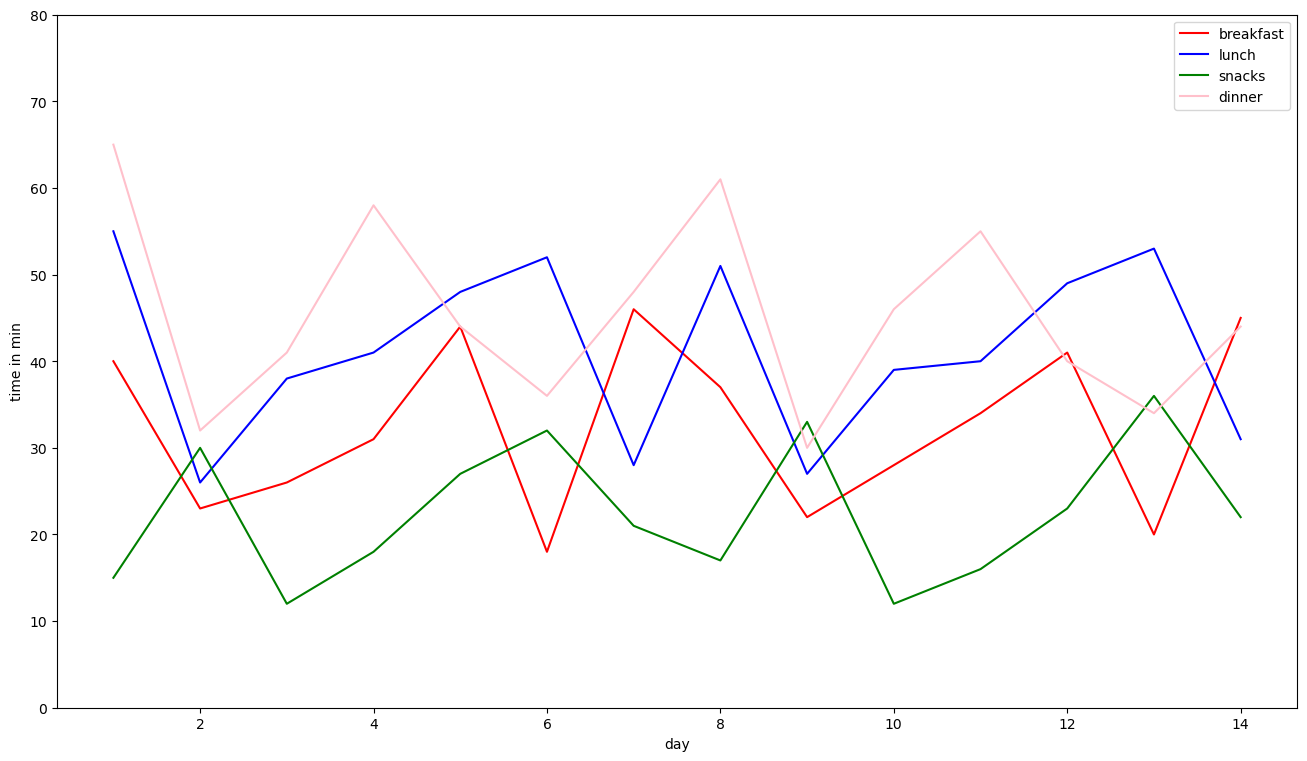

In [5]:
plt.figure(figsize=(16,9))

xaxis = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

plt.xlabel("day")
plt.ylabel("time in min")

plt.plot(xaxis,breakfast,color = 'red',label = 'breakfast')
plt.plot(xaxis,lunch,color = 'blue', label = 'lunch')
plt.plot(xaxis,snacks,color = 'green', label = 'snacks')
plt.plot(xaxis,dinner,color = 'pink',label = 'dinner')

plt.legend()
plt.ylim(0,80)
plt.show()

In [6]:
# Dividing the data into feautures and target.
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [7]:
# One hot encoding the feautures.
ct = ColumnTransformer(transformers = [('encode', OneHotEncoder(), [0])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

## Train - Test Split 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 14)

In [9]:
# Initializing the weights and learning rate.
w = np.zeros(12)
w = w.reshape(-1,1)
learn_rate = 2e-5
tol = 1e-12

In [10]:
# This function returns the gradient of the objective function wrt w.
def grad(X_train, y_train, w):
    n = len(X_train)
    ans = np.zeros(12)
    ans = ans.reshape(-1,1)
    
    for i in range (0,n):
        xi = np.array(X_train[i])
        xi = np.insert(xi,0,1)
        xi = xi.reshape(-1,1)
        c = np.dot(w.T,xi)
        c = c[0][0]
        c = math.exp(c) - y_train[i]
        ans = np.add(ans,c*xi)
    return ans

## Gradient Descent

In [11]:
# Gradient Descent
count = 0
while(True) :
    count = count + 1
    w1 = w - learn_rate*grad(X_train,y_train,w)
    if(np.linalg.norm(w-w1) < tol):
        break
    w = w1
print('The learned weights w = \n', w)
print('Number of iterations = ',count)

The learned weights w = 
 [[2.6981167546665126]
 [0.4809018922909451]
 [0.26601633652645257]
 [0.05133455556930224]
 [0.33053781855645237]
 [0.6332505620786228]
 [0.39705841555812404]
 [0.5390171740866213]
 [0.2468079992559205]
 [0.4852345996019835]
 [0.614909335166498]
 [0.3818723741257487]]
Number of iterations =  21175


In [12]:
# Predicting the results for test data using the learned weights.
y_pred = []
for i in range (len(y_test)):
    xi = np.array(X_test[i])
    xi = np.insert(xi,0,1)
    xi = xi.reshape(-1,1)
    c = np.dot(w.T,xi)
    c = c[0][0]
    c = math.exp(c)
    y_pred.append(c)
print('The predicted results for the test data = \n',y_pred)

The predicted results for the test data = 
 [40.85725903976608, 29.315948449438885, 28.27514554532559, 22.904277519503218, 27.97656839372008, 49.193502262968565, 30.281196652287182, 27.97656839372008, 44.43058048956792, 42.36120722615226, 22.091107902970748, 39.026981745980066]


## Evaluation Metrics 

In [13]:
print('Root Mean Square Error = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R_squared = ', r2_score(y_test,y_pred))

Root Mean Square Error =  8.627464904623292
R_squared =  0.6130411315212481


## Linear Regression Model

In [14]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('The predicted results for the test data using linear regression model = \n',y_pred)

The predicted results for the test data using linear regression model = 
 [41.84939736 28.82359294 27.62359294 22.51891858 30.45990663 48.20922144
 33.42409446 30.45990663 44.70965303 43.04939736 21.31891858 38.96430124]


In [15]:
# Evaluation Metrics for Linear Regression Model
print('Root Mean Square Error = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R_squared = ', r2_score(y_test,y_pred))

Root Mean Square Error =  9.306273363328977
R_squared =  0.5497538451397912
